# **Proyecto 2** | Árboles de decisión

## Link del Repositorio

* https://github.com/paulabaal12/PROY2-DM

## Integrantes del equipo
- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel) 
- [Juan Pablo Solís - 22102](https://github.com/JPS4321)

### **Importar las librerías a utilizar**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

### **Importar los datos de la entrega anterior**

En esta sección, se importan los datos preprocesados de la entrega anterior, donde se realizó la división en conjuntos de entrenamiento y prueba. Estos conjuntos fueron generados en el proceso de preparación de los datos y se utilizarán para entrenar y evaluar los modelos de predicción.

In [80]:
with open("data.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

print(X_train.head(), X_test.head(), y_train.head(), y_test.head())
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas, {X_train.shape[1]} columnas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas, {X_test.shape[1]} columnas")


        Id  MSSubClass  LotFrontage  LotArea  Neighborhood  Condition1  \
87      88         160         40.0     3951      0.058904    0.863014   
1457  1458          70         66.0     9042      0.034932    0.863014   
1000  1001          20         74.0    10206      0.068493    0.863014   
1441  1442         120         69.0     4426      0.102740    0.863014   
927    928          60         69.0     9900      0.050000    0.055479   

      Condition2  OverallQual  OverallCond  YearBuilt  ...  BsmtFinType2_None  \
87      0.989726            6            5       2009  ...              False   
1457    0.989726            7            9       1941  ...              False   
1000    0.989726            3            3       1952  ...               True   
1441    0.989726            6            5       2004  ...              False   
927     0.989726            7            5       1968  ...              False   

      BsmtFinType2_Rec  BsmtFinType2_Unf  GarageType_Attchd  \
87   

### **Árbol de regresión**

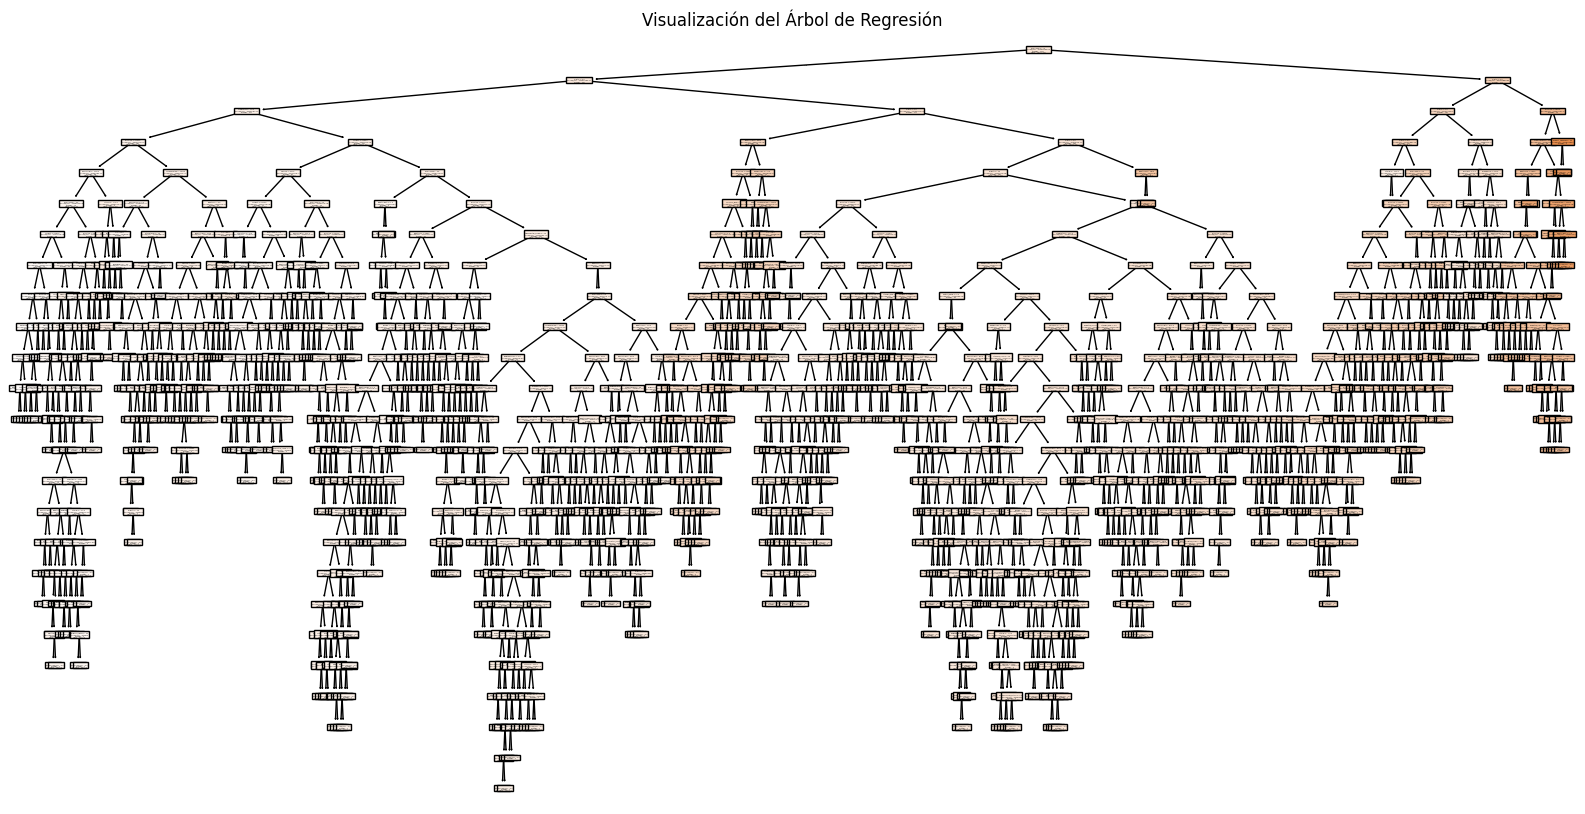


===== Resultados del árbol de regresión inicial =====
R² Score: 0.8917
MAE: $19369.47
MSE: $771748437.57
RMSE: $27780.36


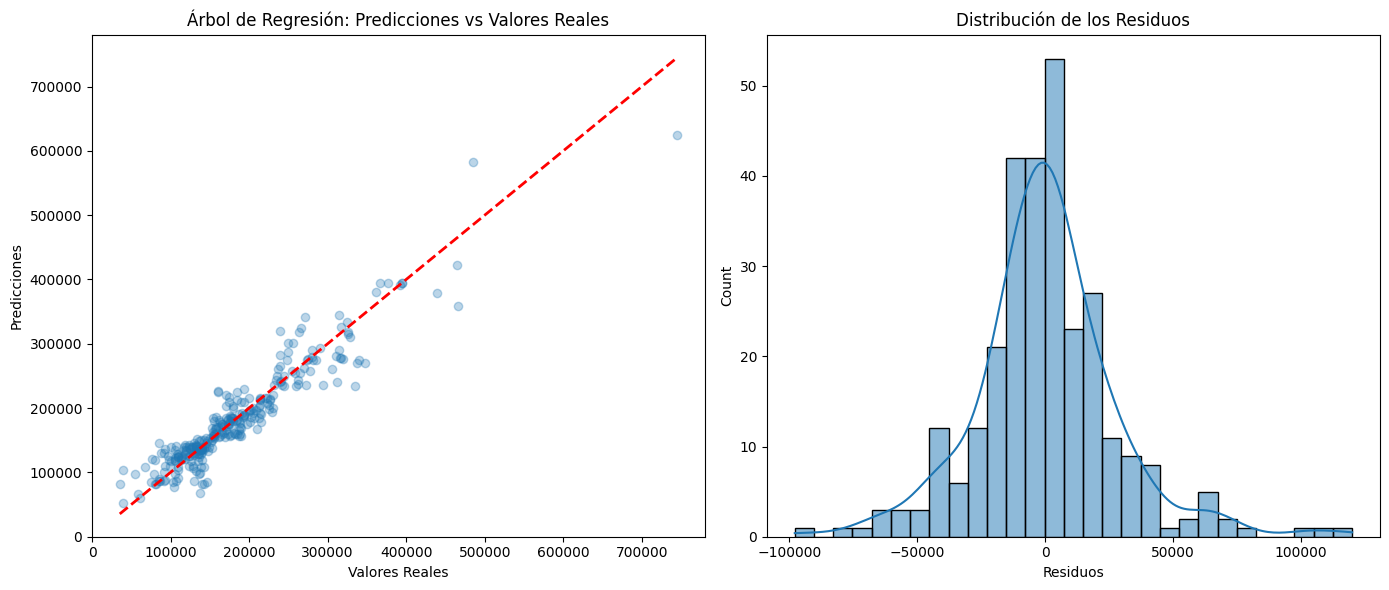

In [81]:

# Elabora un árbol de regresión para predecir el precio de las casas
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_reg, filled=True, feature_names=X_train.columns)
plt.title("Visualización del Árbol de Regresión")
plt.show()

# Usa el árbol para predecir y analizar resultados
y_pred_tree = tree_reg.predict(X_test)

# Calcular métricas de evaluación
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("\n===== Resultados del árbol de regresión inicial =====")
print(f"R² Score: {r2_tree:.4f}")
print(f"MAE: ${mae_tree:.2f}")
print(f"MSE: ${mse_tree:.2f}")
print(f"RMSE: ${rmse_tree:.2f}")

# Graficar los resultados
plt.figure(figsize=(14, 6))

# Gráfico de dispersión de las predicciones vs los valores reales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Árbol de Regresión: Predicciones vs Valores Reales')

# Histograma de los residuos
plt.subplot(1, 2, 2)
residuos = y_test - y_pred_tree
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')

plt.tight_layout()

plt.show()

El árbol de regresión construido para predecir el precio de las casas obtuvo un coeficiente de determinación R² de aproximadamente **0.89**, demostrando que el modelo puede explicar aproximadamente el **89%** de la variabilidad de la variable objetivo `SalesPrice`. Esto sugiere que la estructura del árbol es capaz de capturar y generalizar relaciones más complejas entre las variables predictoras y el precio de las viviendas.

Al analizar los errores de predicción, se observa una mejora considerable. El error absoluto medio (MAE) es de 19,369.47, lo que indica que, en promedio, las predicciones del modelo presentan un margen de error de aproximadamente **19,370 dólares**. La raíz del error cuadrático medio (RMSE) se encuentra en **27,780.36**, indicando que las desviaciones estándar de las predicciones con respecto a los valores reales son más bajas en comparación con los modelos lineales previos. Esto demuestra que el árbol de regresión no solo ofrece mayor precisión, sino que también presenta un mejor ajuste en términos de predicción de precios.

### **Otros modelos**


===== Resultados con max_depth=5 =====
R² Score: 0.8507
MAE: $20446.58
RMSE: $32610.06


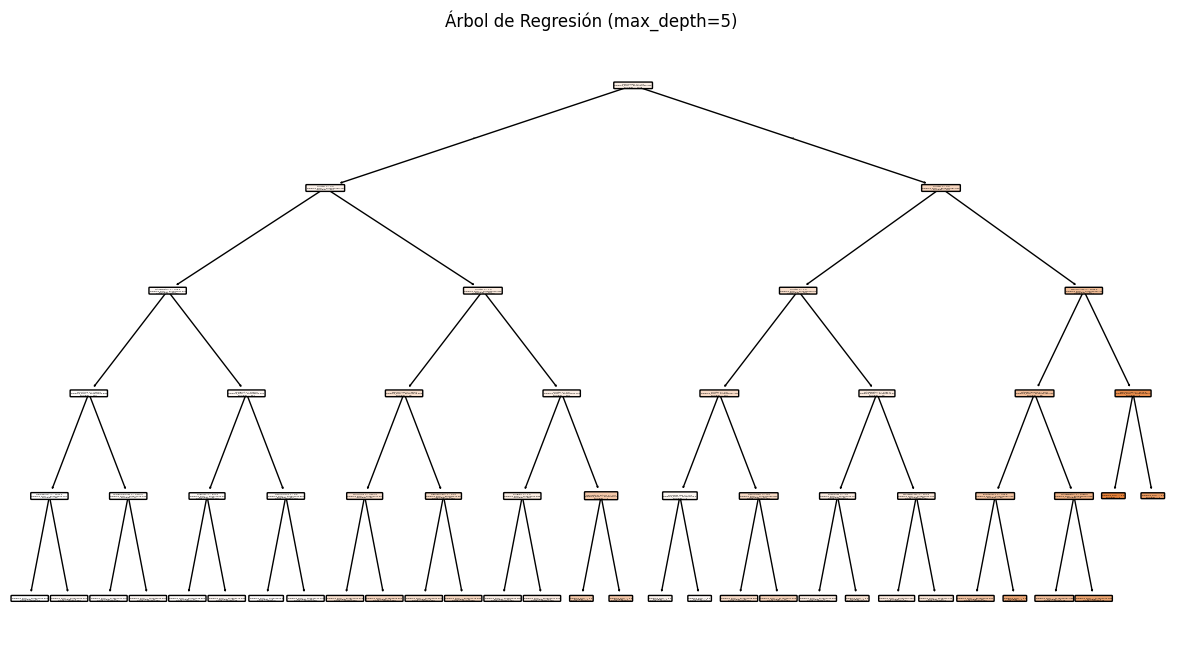


===== Resultados con max_depth=10 =====
R² Score: 0.8911
MAE: $19158.32
RMSE: $27857.66


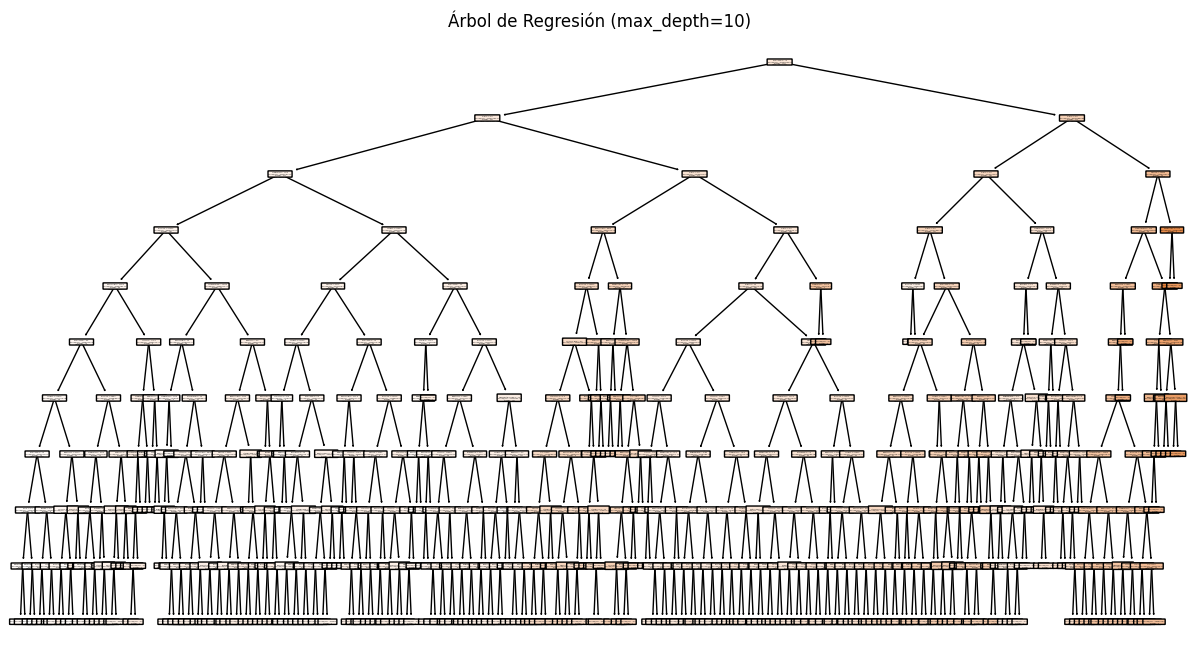


===== Resultados con max_depth=15 =====
R² Score: 0.8848
MAE: $19468.39
RMSE: $28645.05


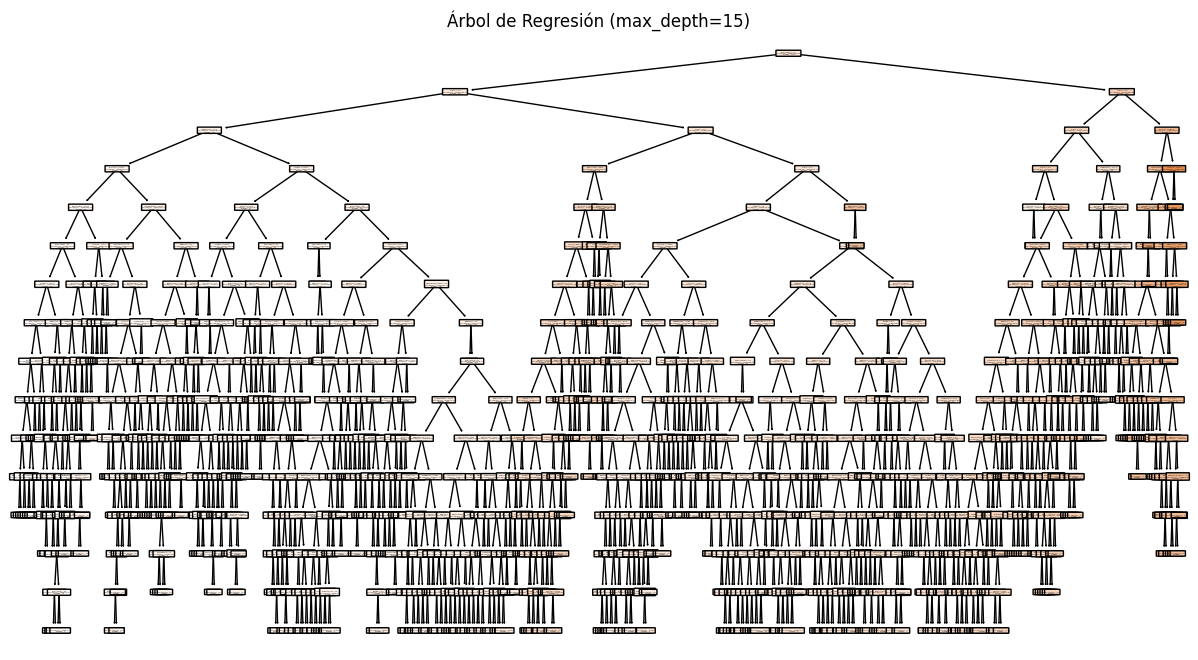


===== Resultados con max_depth=20 =====
R² Score: 0.8749
MAE: $19498.43
RMSE: $29846.01


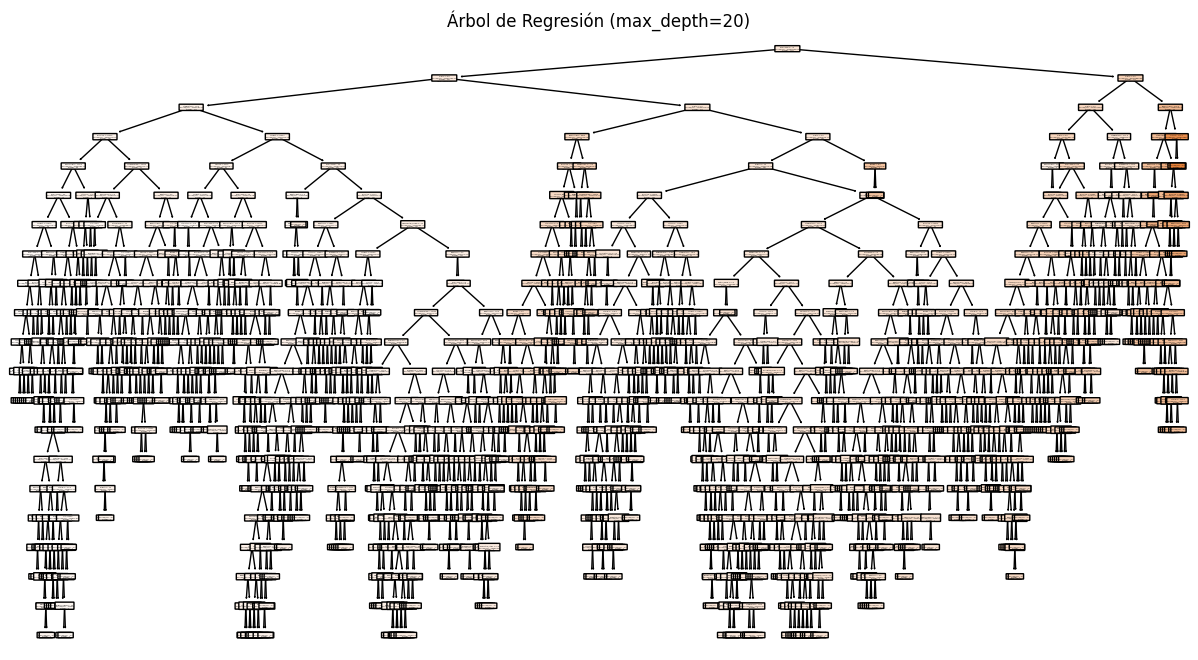


Resumen de modelos con diferentes profundidades:
   max_depth        r2           mae          rmse
0          5  0.850708  20446.576235  32610.060270
1         10  0.891051  19158.316681  27857.660804
2         15  0.884806  19468.392200  28645.045326
3         20  0.874944  19498.430365  29846.012002


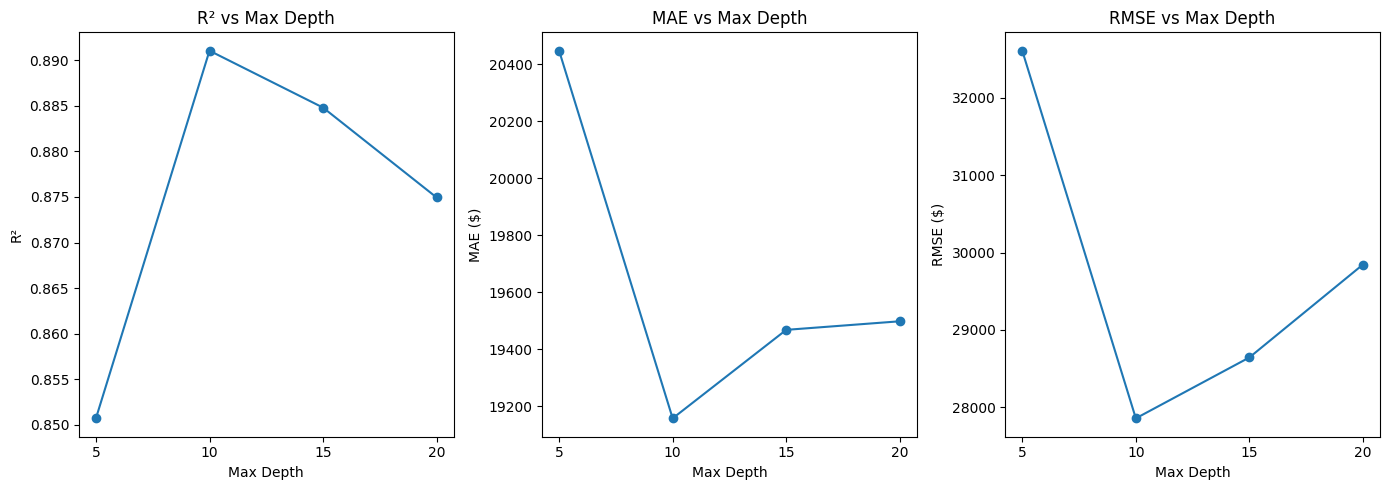


La mejor profundidad para el árbol es: 10

Variables más importantes para el árbol de regresión:
          Feature  Importance
7     OverallQual    0.467867
146       Cluster    0.417827
27       2ndFlrSF    0.022873
23    TotalBsmtSF    0.015827
29      GrLivArea    0.013945
37   TotRmsAbvGrd    0.008373
20     BsmtFinSF1    0.006166
9       YearBuilt    0.005614
32       FullBath    0.003939
3         LotArea    0.003849


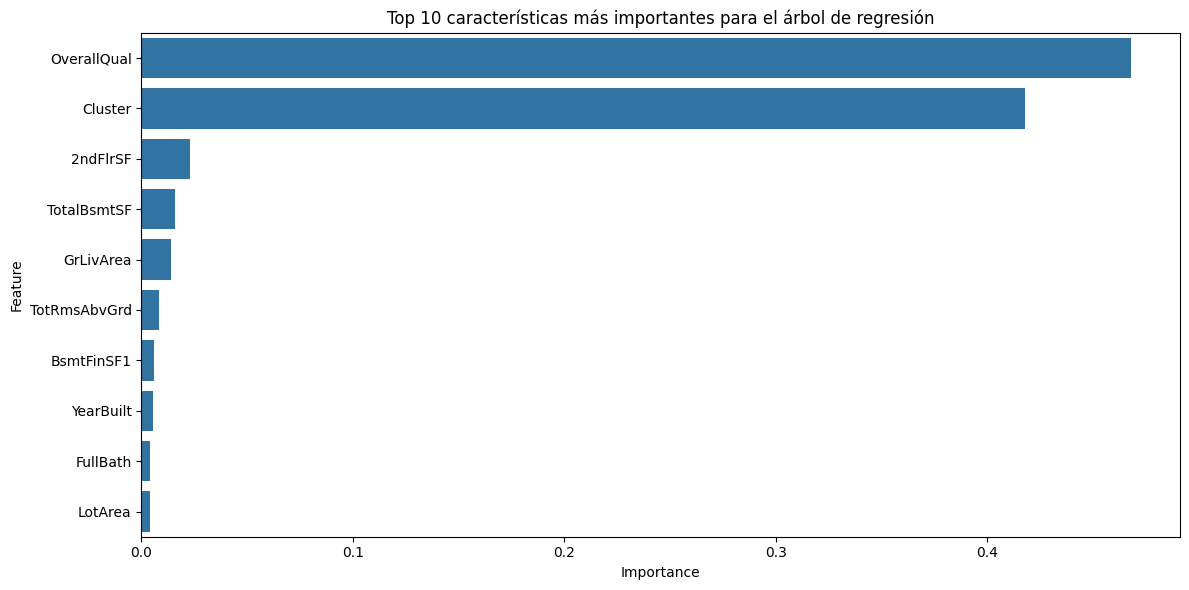

In [82]:
max_depths = [5, 10, 15, 20]  
models_results = []

for depth in max_depths:
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)
    
    # Predecir con el modelo
    y_pred = tree_model.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Guardar resultados
    models_results.append({
        'max_depth': depth,
        'r2': r2,
        'mae': mae,
        'rmse': rmse
    })
    
    print(f"\n===== Resultados con max_depth={depth} =====")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: ${mae:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    
    # Visualizar el árbol de decisión
    plt.figure(figsize=(15, 8))
    tree.plot_tree(tree_model, feature_names=X_train.columns, filled=True, rounded=True)
    plt.title(f'Árbol de Regresión (max_depth={depth})')
    plt.show()

# Convertir a DataFrame para visualización
results_df = pd.DataFrame(models_results)
print("\nResumen de modelos con diferentes profundidades:")
print(results_df)

# Visualizar resultados de diferentes profundidades
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(results_df['max_depth'].astype(str), results_df['r2'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R²')
plt.title('R² vs Max Depth')

plt.subplot(1, 3, 2)
plt.plot(results_df['max_depth'].astype(str), results_df['mae'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('MAE ($)')
plt.title('MAE vs Max Depth')

plt.subplot(1, 3, 3)
plt.plot(results_df['max_depth'].astype(str), results_df['rmse'], marker='o')
plt.xlabel('Max Depth')
plt.ylabel('RMSE ($)')
plt.title('RMSE vs Max Depth')

plt.tight_layout()
plt.show()

# Seleccionar el mejor modelo basado en R²
best_depth = results_df.loc[results_df['r2'].idxmax(), 'max_depth']
if pd.isna(best_depth):
    best_depth = None
print(f"\nLa mejor profundidad para el árbol es: {best_depth}")

# Crear el mejor modelo
best_tree_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
best_tree_model.fit(X_train, y_train)
y_pred_best_tree = best_tree_model.predict(X_test)

# Obtener las variables más importantes para el modelo
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_tree_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nVariables más importantes para el árbol de regresión:")
print(feature_importance.head(10))

# Visualizar importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 características más importantes para el árbol de regresión')
plt.tight_layout()
plt.show()

#### **Análisis del desempeño del árbol de regresión con distintas profundidades**

Se entrenaron cuatro modelos de árboles de regresión variando la profundidad máxima del árbol `max_depth`, evaluando su capacidad predictiva mediante métricas como el coeficiente de determinación R² , el error absoluto medio (MAE) y el error cuadrático medio (RMSE). 

Los resultados muestran que el modelo con una **profundidad de 10** logra el mejor equilibrio entre ajuste y generalización, con un R² de **0.89**, lo que indica que captura adecuadamente la variabilidad en los precios de las viviendas. Además, presenta los errores más bajos, con un MAE de 19,158.32 y un RMSE de 27,857.66, en comparación con los otros modelos evaluados.

Este modelo es el más adecuado, ya que ofrece un balance óptimo entre precisión y capacidad de generalización. Mientras que modelos con menor profundidad pueden perder información relevante, modelos con mayor profundidad tienden a sobreajustarse a los datos de entrenamiento, reduciendo su efectividad en nuevas predicciones.




#### **Comparación entre el árbol de regresión y los modelos de regresión lineal** 

Los modelos de regresión lineal múltiple y Ridge lograron un desempeño aceptable con posibles márgenes de mejora, con valores de R² de **0.58** y **0.71**, respectivamente. Esto indica que ambos modelos pueden explicar una parte considerable de la variabilidad en los precios de las viviendas. Sin embargo, el modelo de regresión lineal univariada, que solo consideró la variable GrLivArea, obtuvo un R² de **0.40**, lo que demuestra que una única variable no es suficiente para capturar con precisión la complejidad del fenómeno.

Por otro lado, los árboles de regresión mostraron un mejor rendimiento en la predicción. En particular, el árbol con una profundidad máxima de 10 ofreció el mejor equilibrio entre precisión y generalización, alcanzando un R² de **0.89** y logrando menores errores en las predicciones.

De todos los modelos, el mejor es el árbol de regresión con `max_depth` igual a **10**, ya que proporcionó un ajuste más preciso sin caer en un sobreajuste y es capaz de explicar la mayoría de la variabilidad de los datos. Esto demuestra que la relación entre las características de las viviendas y su precio de venta no es completamente lineal, y que modelos más flexibles, como los árboles de decisión, son capaces de capturar de mejor manera la complejidad de estos datos.

## **Creación de Variable Respuesta**

#### Observación de la distribución de precios

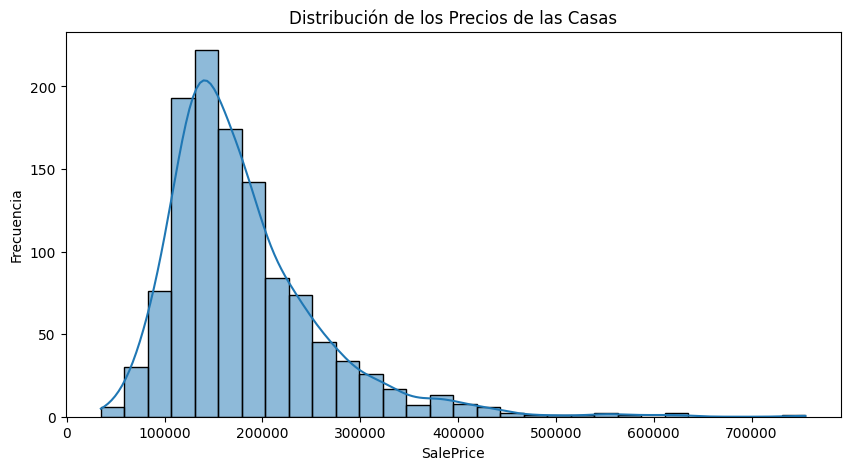

In [83]:
plt.figure(figsize=(10, 5))
sns.histplot(y_train, kde=True, bins=30)
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Precios de las Casas")
plt.show()


Para realizar la clasificación, primero que nada se realizó un histograma de los precios de venta, mostrando que existe un sesgo en los precios de venta e indicando que la mayoría de las casas tienen precios relativamente bajos o intermedios, mientras que hay algunas pocas propiedades con precios significativamente más altos.

Para definir los límites de cada categoría, se optó por segmentar los datos en tres grupos utilizando los **terciles (percentiles 33% y 66%)** de la distribución de precios. Este enfoque permite dividir las casas en partes aproximadamente iguales, asegurando que cada categoría tenga una cantidad balanceada.

Límite Económico: 139411.00
Límite Intermedio: 189000.00
SalePrice
Cara          392
Intermedia    390
Económica     386
Name: count, dtype: int64


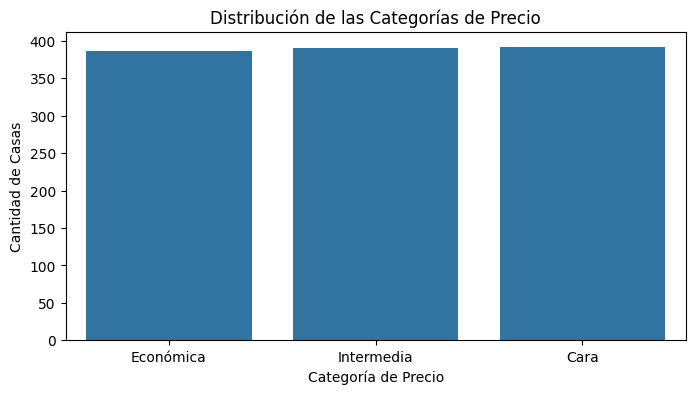

In [84]:
low_threshold = y_train.quantile(0.33)
high_threshold = y_train.quantile(0.66)

print(f"Límite Económico: {low_threshold:.2f}")
print(f"Límite Intermedio: {high_threshold:.2f}")

# Crear la variable categórica de clasificación
def categorize_price(price):
    if price <= low_threshold:
        return "Económica"
    elif price <= high_threshold:
        return "Intermedia"
    else:
        return "Cara"

y_train_class = y_train.apply(categorize_price)
y_test_class = y_test.apply(categorize_price)

print(y_train_class.value_counts())

X_train["PriceCategory"] = y_train_class
X_test["PriceCategory"] = y_test_class

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_class, order=["Económica", "Intermedia", "Cara"])
plt.xlabel("Categoría de Precio")
plt.ylabel("Cantidad de Casas")
plt.title("Distribución de las Categorías de Precio")
plt.show()

Después de dividir las casas en las tres categorías se puede observar lo siguiente:
* El primer tercil tiene un precio maximo de 139,411 siendo este el máximo de la clase "Económica" y teniendo 386 propiedades.
* El segundo tercil tiene un precio de 189,000 siendo el mínimo de clase "Cara" y teniendo 392 propiedades. 

Por último, la clase de precio "Intermedia" se mantiene entre el maximo de la clase "Económica" y el mínimo de la clase "Cara" teniendo 390 propiedades.

Además, se observa una diferencia mínima entre las categorías de las viviendas, por lo que no habrá un efecto relevante que pueda afectar considerablemente el rendimiento del modelo.

### **Árbol de Clasificación**

##### Para realizar el árbol, primero excluiremos la variable ```id``` y ```PriceCategory``` del conjunto de entrenamiento

In [85]:
columns_to_exclude = ["Id", "PriceCategory"]

X_train_classification = X_train.drop(columns=columns_to_exclude)
X_test_classification = X_test.drop(columns=columns_to_exclude)

y_train_classification = y_train_class
y_test_classification = y_test_class


print(f"Dimensiones de X_train_classification: {X_train_classification.shape}")
print(f"Dimensiones de X_test_classification: {X_test_classification.shape}")
print(f"Clases en y_train_classification: {y_train_classification.unique()}")


Dimensiones de X_train_classification: (1168, 146)
Dimensiones de X_test_classification: (292, 146)
Clases en y_train_classification: ['Intermedia' 'Cara' 'Económica']


Entrenamos un árbol de decisión con una profundidad máxima de 5

In [86]:
profundidad_max = 5

clf = DecisionTreeClassifier(max_depth=profundidad_max, random_state=42)
clf.fit(X_train_classification, y_train_classification)


y_pred_classification = clf.predict(X_test_classification)



Dado que las clases están relativamente balanceadas en términos de cantidad de datos, el **accuracy** es una métrica adecuada para evaluar el desempeño del modelo. Como no hay una clase que domine significativamente a las demás, esta métrica refleja de manera justa la capacidad del modelo para clasificar correctamente cada categoría.

In [87]:
accuracy = accuracy_score(y_test_classification, y_pred_classification)

conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)

print(f"Exactitud del modelo: {accuracy:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(class_report)


Exactitud del modelo: 0.8527

Matriz de Confusión:
[[88  0 17]
 [ 0 88 11]
 [ 7  8 73]]

Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.93      0.84      0.88       105
   Económica       0.92      0.89      0.90        99
  Intermedia       0.72      0.83      0.77        88

    accuracy                           0.85       292
   macro avg       0.86      0.85      0.85       292
weighted avg       0.86      0.85      0.86       292



#### **Análisis de las métricas**
##### Accuracy:
- Se obtuvo un buen desempeño del modelo, ya que logra clasificar correctacmente un **85.27%** de las casas.

El modelo tiene una buena capacidad de clasificación, ya que la mayoría de los valores están en la diagonal principal, lo que significa que los datos fueron bien clasificados en su respectiva categoría.

##### **Matriz de confusión**: La matriz obtenida se puede visualizar de una mejor manera a continuación:

|           |Predicción - Cara |Predicción - Económica |Predicción - Intermedia |
|-----------|------|-----------|------------|
|Real: Cara |88    |0          |17          |
|Real: Económica |0    |88          |11          |
|Real: Intermedia |7    |8          |73          |


- En la matriz se puede observar que se confundió más veces clasificado las casas como ```Intermedia```, 7 veces con ```Cara``` y 8 veces con ```Económica```
- No hay confusiones entre ```Cara``` y ```Económica```, lo cuál es buen indicio de la efectividad del modelo.

#### Reporte de Clasificación
* La clase más difícil de clasificar es la de ```Intermedia``` con un 72%
* ```Intermedia``` tiene un recall más alto que su precisión, lo cuál significa que cuando realmente es ```Intermedia```, el modelo la identifica en la mayoría de casos. Sin ambargo, su precisión baja indica que también se clasifican otras casas como intermedia por error.
* En resumen, la clase más difícil de clasificar es la de ```Intermedia```. Lo cuál no es tan grave ya que es en muy pocos casos donde se equivoca. También puede influir la manera en que se definieron los parámetros para cada tipo de casas.

Mostramos el árbol de decisión con los nombres de las características y clases.

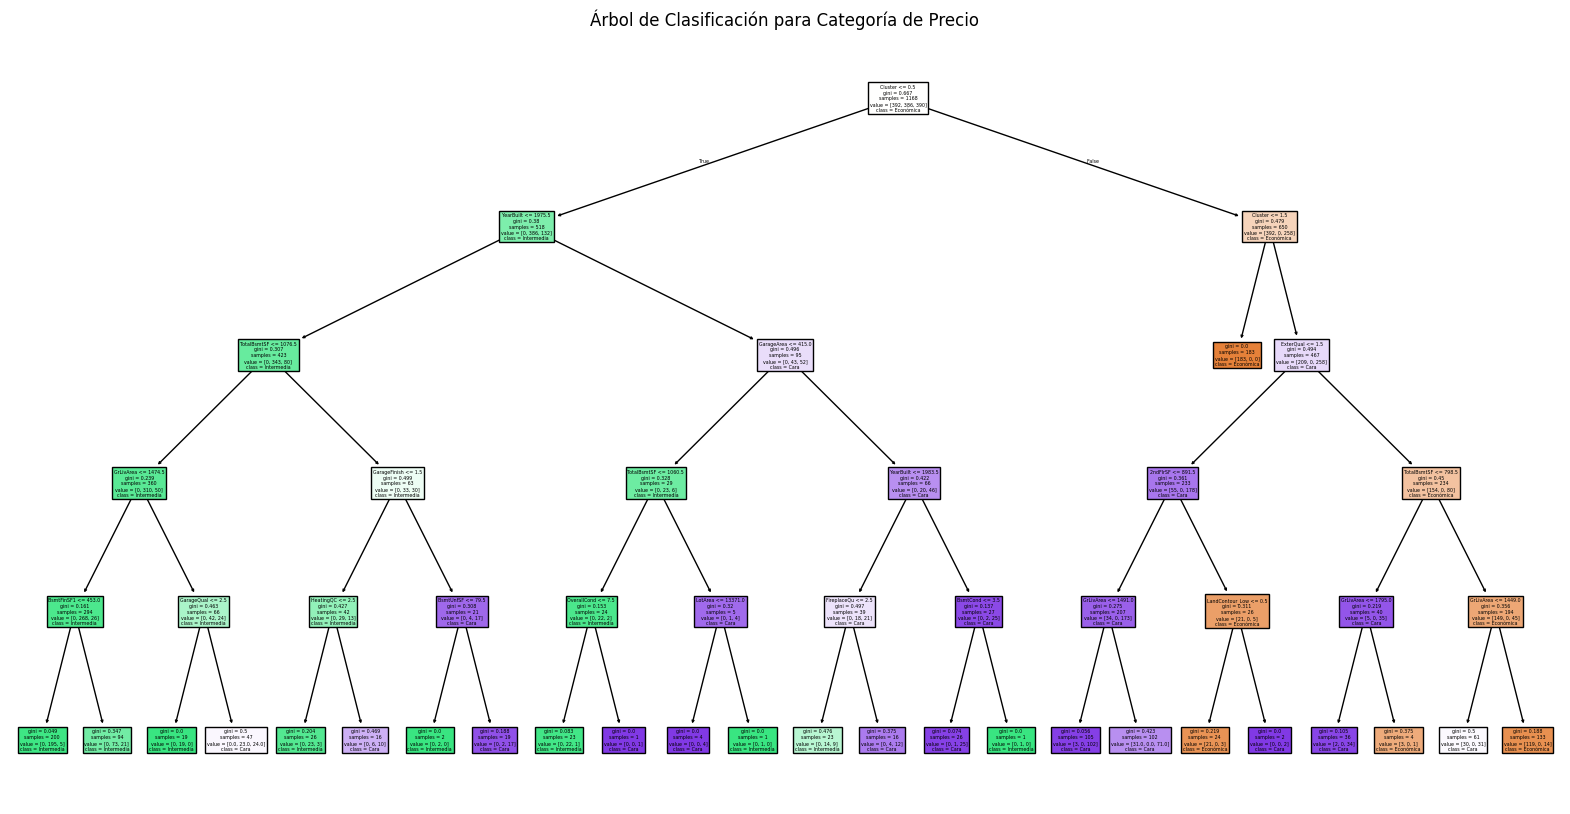

In [88]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X_train_classification.columns, 
               class_names=["Económica", "Intermedia", "Cara"], filled=True)

plt.title("Árbol de Clasificación para Categoría de Precio")
plt.show()


In [89]:
feature_importances = pd.DataFrame(
    {"Feature": X_train_classification.columns, "Importance": clf.feature_importances_}
).sort_values(by="Importance", ascending=False)

print("Importancia de las características:")
print(feature_importances)


Importancia de las características:
                Feature  Importance
145             Cluster    0.626154
22          TotalBsmtSF    0.078273
14            ExterQual    0.074204
28            GrLivArea    0.058979
8             YearBuilt    0.044068
..                  ...         ...
139   GarageType_Attchd    0.000000
141  GarageType_BuiltIn    0.000000
142  GarageType_CarPort    0.000000
143   GarageType_Detchd    0.000000
144     GarageType_None    0.000000

[146 rows x 2 columns]


### **Conclusión del árbol categórico**
El modelo logró una exactitud del **85.27%**, con un buen desempeño en las clases ```Cara``` y ```Económica```, pero con mayor dificultad para clasificar correctamente la categoría ```Intermedia```, lo que sugiere que algunas características podrían no estar claramente diferenciando esta clase.

El análisis de importancia de las características muestra que la variable ```Cluster``` tiene el mayor peso en la clasificación, con una importancia del **62.6%**, seguida de ```TotalBsmtSF```, ```ExterQual``` y ```GrLivArea```, lo que indica que factores relacionados con la calidad exterior, el área habitable y el tamaño del sótano son determinantes en la categorización de los precios.

Otras variables, como ciertos tipos de garaje, no contribuyeron al modelo, lo que podría sugerir que su impacto en la clasificación es mínimo. lo que sugiere que podríamos optimizar el modelo ajustando sus parámetros o seleccionando mejor las variables más relevantes.

Para evaluar mejor su capacidad de generalización y evitar sobreajuste, en el siguiente paso realizaremos una **validación cruzada**, lo que nos permitirá obtener una estimación más robusta del desempeño del modelo. 

#### **Entrenar el modelo implementando la validación cruzada**

In [90]:
from sklearn.model_selection import cross_val_score

# Definir el modelo de árbol de decisión con la misma profundidad máxima
clf_cv = DecisionTreeClassifier(max_depth=5, random_state=42)

# Aplicar validación cruzada con 5 particiones
cv_scores = cross_val_score(clf_cv, X_train_classification, y_train_classification, cv=5, scoring='accuracy')

# Imprimir los resultados
print(f"Exactitud promedio con validación cruzada: {np.mean(cv_scores):.4f}")
print(f"Desviación estándar de la validación cruzada: {np.std(cv_scores):.4f}")

# Entrenar el modelo con todos los datos de entrenamiento y hacer predicciones
clf_cv.fit(X_train_classification, y_train_classification)
y_pred_cv = clf_cv.predict(X_test_classification)

# Calcular la exactitud final en el conjunto de prueba
accuracy_cv = accuracy_score(y_test_classification, y_pred_cv)
print(f"Exactitud del modelo en el conjunto de prueba: {accuracy_cv:.4f}")


Exactitud promedio con validación cruzada: 0.7851
Desviación estándar de la validación cruzada: 0.0237
Exactitud del modelo en el conjunto de prueba: 0.8527


Los resultados muestran que la exactitud promedio con validación cruzada fue **0.7851**, con una desviación estándar de **0.0237**, lo que indica que el modelo es relativamente estable en diferentes subconjuntos de entrenamiento y prueba. Sin embargo, al evaluar el modelo final en el conjunto de prueba, se obtuvo una exactitud de **0.8527**, lo que sugiere que el modelo logró un mejor rendimiento cuando se entrenó con todos los datos disponibles. Esta diferencia indica que, aunque la validación cruzada no mejoró directamente la precisión final, sí permitió evaluar la estabilidad del modelo y confirmar que su desempeño no depende excesivamente de una partición específica de los datos.

En comparación con el modelo anterior, los resultados son similares, por lo que la validación cruzada no representó una mejora significativa en la exactitud. No obstante, sigue siendo útil porque permite evaluar qué tan estable es el modelo en diferentes particiones de los datos de entrenamiento. Dado que la desviación estándar obtenida fue baja, se confirma que el modelo tiene una capacidad de generalización adecuada sin necesidad de ajustes adicionales en la profundidad del árbol o en otros hiperparámetros.

#### **Generación de otros modelos**

Profundidad 10: CV Accuracy = 0.7851, Test Accuracy = 0.8151
Profundidad 15: CV Accuracy = 0.7826, Test Accuracy = 0.7979
Profundidad 20: CV Accuracy = 0.7826, Test Accuracy = 0.7979


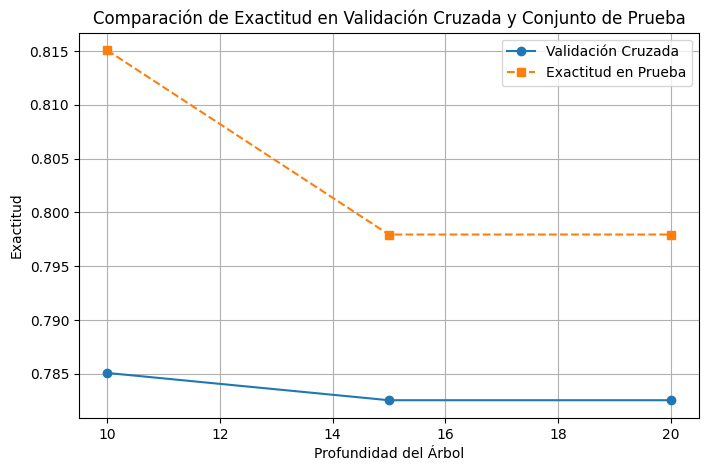

In [91]:

# Definir diferentes profundidades para el árbol de clasificación
depths = [10, 15, 20]
cv_accuracies = []
test_accuracies = []

for depth in depths:
    clf_cv = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Validación cruzada
    scores = cross_val_score(clf_cv, X_train_classification, y_train_classification, cv=5, scoring='accuracy')
    cv_accuracies.append(np.mean(scores))  # Guardar media de la validación cruzada
    
    # Entrenar con todo el set de entrenamiento y evaluar en el set de prueba
    clf_cv.fit(X_train_classification, y_train_classification)
    test_accuracy = clf_cv.score(X_test_classification, y_test_classification)
    test_accuracies.append(test_accuracy)  

for i, depth in enumerate(depths):
    print(f"Profundidad {depth}: CV Accuracy = {cv_accuracies[i]:.4f}, Test Accuracy = {test_accuracies[i]:.4f}")

# Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(depths, cv_accuracies, marker='o', linestyle='-', label="Validación Cruzada")
plt.plot(depths, test_accuracies, marker='s', linestyle='--', label="Exactitud en Prueba")

plt.xlabel("Profundidad del Árbol")
plt.ylabel("Exactitud")
plt.title("Comparación de Exactitud en Validación Cruzada y Conjunto de Prueba")
plt.legend()
plt.grid(True)
plt.show()


Los resultados obtenidos muestran cómo la profundidad del árbol de decisión afecta su capacidad de generalización. A medida que la profundidad aumenta de 10 a 20, la exactitud en el conjunto de prueba disminuye levemente de **0.8151** a **0.7979**, mientras que la exactitud en validación cruzada baja de **0.7851 a 0.7826**. Esto sugiere que a partir de cierta profundidad, el modelo empieza a perder capacidad de generalización.

El gráfico confirma esta tendencia, ya que la exactitud en validación cruzada disminuye progresivamente con profundidades mayores, y la exactitud en prueba alcanza su mejor valor con profundidad 10. A partir de profundidad 15, el modelo no mejora y muestra una ligera degradación en su rendimiento. Dado que un modelo más simple con mejor generalización suele ser preferible, **max_depth=10** parece ser la mejor opción, ya que se muestra un buen equilibrio entre la precisión y la capacidad de generalización.

### **Implementación de Random Forest**

A continuación se repetirá el análisis anterior pero implementando Random Forest

#### **Regresión**

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train.iloc[:,:-1], y_train)
y_pred_rf = rf_regressor.predict(X_test.iloc[:,:-1])

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.4f}")
print(f"Random Forest - R²: {r2_rf:.4f}")



Random Forest - MSE: 452205439.9144
Random Forest - R²: 0.9365


#### **Random Forest para Clasificación**

Se utiliza la variable antes creada: ```PriceCategory``` para entrenar el modelo

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train_classification, y_train_classification)

y_pred_rf_class = rf_classifier.predict(X_test_classification)

accuracy_rf = accuracy_score(y_test_classification, y_pred_rf_class)
print(f"Exactitud del Random Forest: {accuracy_rf:.4f}")

conf_matrix = confusion_matrix(y_test_classification, y_pred_rf_class)
print("Matriz de confusión:\n", conf_matrix)

print("Reporte de clasificación:\n", classification_report(y_test_classification, y_pred_rf_class))


Exactitud del Random Forest: 0.9007
Matriz de confusión:
 [[100   0   5]
 [  0  90   9]
 [  8   7  73]]
Reporte de clasificación:
               precision    recall  f1-score   support

        Cara       0.93      0.95      0.94       105
   Económica       0.93      0.91      0.92        99
  Intermedia       0.84      0.83      0.83        88

    accuracy                           0.90       292
   macro avg       0.90      0.90      0.90       292
weighted avg       0.90      0.90      0.90       292



#### Análisis de las métricas

El modelo de **Random Forest** mostró un desempeño bastente bien tanto en regresión como en clasificación.
* En regresión, obtuvo un **R²** de **0.9365** y un **MSE** de **452,205,439.91** (equivalente a un RMSE 21,270), lo que indica que el modelo explica el **93.65%** de la varianza de los datos.
* En clasificación, logró una exactitud del **90.07%**, lo cual es bastante alto para un problema con múltiples clases.

Estos resultados son significativamente mejores en comparación con modelos más simples como la regresión lineal o un árbol de decisión individual, lo que demuestra que la combinación de múltiples árboles en **Random Forest** ayuda a reducir el sobreajuste y mejora la generalización del modelo.

##### **Matriz de confusión**:
* La matriz obtenida se puede visualizar de una mejor manera a continuación:

    |           |Predicción - Cara |Predicción - Económica |Predicción - Intermedia |
    |-----------|------|-----------|------------|
    |Real: Cara |100    |0        |5       |
    |Real: Económica |0    |90         |9          |
    |Real: Intermedia |8   |7        |73          |

* De dicha tabla, se logró obtener también los siguientes datos:
    * La clase "Cara" tiene la mejor precisión y recall (~93%)
    * La clase "Económica" también es bien clasificada (~91%)
    * La clase "Intermedia" tiene menor desempeño (~83%), lo que sugiere que los datos en esta categoría siguen siendo más difíciles de separar.


#### **Validación Cruzada en Random Forest**

##### Para regresión

In [94]:
from sklearn.model_selection import cross_val_score

rf_regressor_cv = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

cv_scores_rf = cross_val_score(rf_regressor_cv, X_train.iloc[:, :-1], y_train, cv=5, scoring='r2')

# Calcular la exactitud final en el conjunto de prueba
accuracy_cv = accuracy_score(y_test_classification, y_pred_cv)

print(f"R² promedio con validación cruzada: {np.mean(cv_scores_rf):.4f}")
print(f"Desviación estándar de la validación cruzada: {np.std(cv_scores_rf):.4f}")


R² promedio con validación cruzada: 0.9286
Desviación estándar de la validación cruzada: 0.0101


##### Para la clasificación

In [95]:
rf_classifier_cv = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

cv_scores_rf_class = cross_val_score(rf_classifier_cv, X_train_classification, y_train_classification, cv=5, scoring='accuracy')

print(f"Exactitud promedio con validación cruzada: {np.mean(cv_scores_rf_class):.4f}")
print(f"Desviación estándar de la validación cruzada: {np.std(cv_scores_rf_class):.4f}")

Exactitud promedio con validación cruzada: 0.8442
Desviación estándar de la validación cruzada: 0.0265


#### Análisis de la Validación Cruzada

Se realizaron pruebas de validación cruzada para evaluar la estabilidad del modelo:

**Regresión:**
* R² promedio con validación cruzada: **0.9286**
* Desviación estándar: **0.0101**

Esto indica que el modelo tiene un desempeño estable en distintos subconjuntos de datos, con una variación mínima del 1% en el coeficiente de determinación.

**Clasificación:**
* Exactitud promedio con validación cruzada: **84.42%**
* Desviación estándar: **2.65%**

El modelo muestra cierta variabilidad, pero sigue teniendo un desempeño consistente con una diferencia pequeña entre los distintos conjuntos de prueba.

#### **Generación de otros modelos de Random Forest**

##### **Regresión con Random Forest**

Profundidad: 5
  R² Validación Cruzada: 0.9146
  R² en Prueba: 0.9224
----------------------------------------
Profundidad: 10
  R² Validación Cruzada: 0.9286
  R² en Prueba: 0.9365
----------------------------------------
Profundidad: 15
  R² Validación Cruzada: 0.9280
  R² en Prueba: 0.9350
----------------------------------------
Profundidad: 20
  R² Validación Cruzada: 0.9286
  R² en Prueba: 0.9325
----------------------------------------


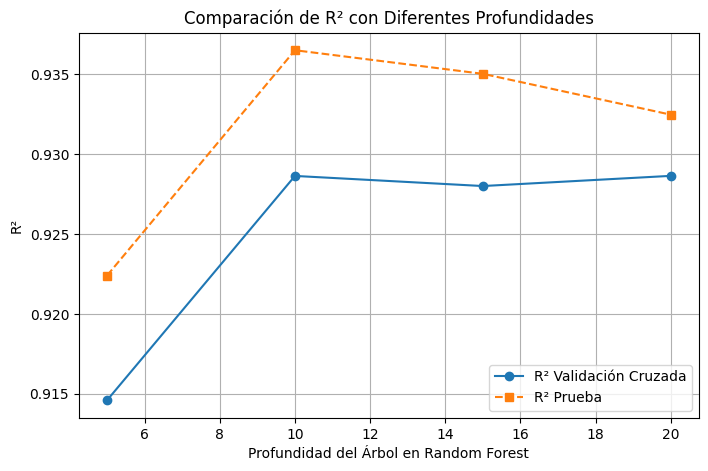

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

depths = [5, 10, 15, 20]
cv_r2_scores = []
test_r2_scores = []

for depth in depths:
    rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
    
    scores = cross_val_score(rf_regressor, X_train.iloc[:, :-1], y_train, cv=5, scoring='r2')
    cv_r2_scores.append(np.mean(scores))
    
    rf_regressor.fit(X_train.iloc[:, :-1], y_train)
    y_pred = rf_regressor.predict(X_test.iloc[:, :-1])
    test_r2_scores.append(r2_score(y_test, y_pred))
    
    print(f"Profundidad: {depth}")
    print(f"  R² Validación Cruzada: {np.mean(scores):.4f}")
    print(f"  R² en Prueba: {r2_score(y_test, y_pred):.4f}")
    print("-" * 40)

plt.figure(figsize=(8, 5))
plt.plot(depths, cv_r2_scores, marker='o', linestyle='-', label="R² Validación Cruzada")
plt.plot(depths, test_r2_scores, marker='s', linestyle='--', label="R² Prueba")

plt.xlabel("Profundidad del Árbol en Random Forest")
plt.ylabel("R²")
plt.title("Comparación de R² con Diferentes Profundidades")
plt.legend()
plt.grid(True)
plt.show()



#### **Clasificación con Random Forest**

Profundidad: 5
  Exactitud Validación Cruzada: 0.8382
  Exactitud en Prueba: 0.8562
----------------------------------------
Profundidad: 10
  Exactitud Validación Cruzada: 0.8442
  Exactitud en Prueba: 0.9007
----------------------------------------
Profundidad: 15
  Exactitud Validación Cruzada: 0.8476
  Exactitud en Prueba: 0.8973
----------------------------------------
Profundidad: 20
  Exactitud Validación Cruzada: 0.8544
  Exactitud en Prueba: 0.8870
----------------------------------------


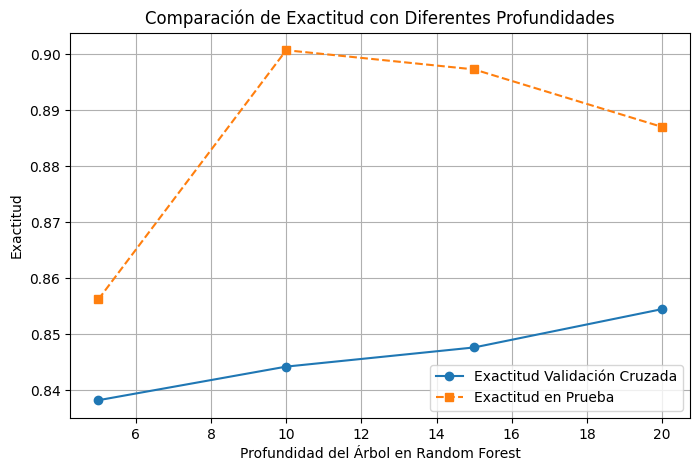

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

depths = [5, 10, 15, 20]
cv_accuracies = []
test_accuracies = []

for depth in depths:
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)

    scores = cross_val_score(rf_classifier, X_train_classification, y_train_classification, cv=5, scoring='accuracy')
    cv_accuracies.append(np.mean(scores))
    
    rf_classifier.fit(X_train_classification, y_train_classification)
    test_accuracy = rf_classifier.score(X_test_classification, y_test_classification)
    test_accuracies.append(test_accuracy)
    
    print(f"Profundidad: {depth}")
    print(f"  Exactitud Validación Cruzada: {np.mean(scores):.4f}")
    print(f"  Exactitud en Prueba: {test_accuracy:.4f}")
    print("-" * 40)

plt.figure(figsize=(8, 5))
plt.plot(depths, cv_accuracies, marker='o', linestyle='-', label="Exactitud Validación Cruzada")
plt.plot(depths, test_accuracies, marker='s', linestyle='--', label="Exactitud en Prueba")

plt.xlabel("Profundidad del Árbol en Random Forest")
plt.ylabel("Exactitud")
plt.title("Comparación de Exactitud con Diferentes Profundidades")
plt.legend()
plt.grid(True)
plt.show()


#### Análisis de las variaciones en el modelo

Ambos modelos se entrenaron usando Random Forest con diferentes profundidades de árbol **(5, 10, 15, 20)** y se evaluaron utilizando validación cruzada y conjunto de prueba. A continuación, se analizan los resultados obtenidos para cada tarea:

* Regresión:

    |Profundidad|	R² Validación Cruzada	|R² en Prueba|
    |-----------|------|-----------|
    |5	|0.9146	|0.9224|
    |10	|0.9286	|0.9365|
    |15	|0.9280	|0.9350|
    |20	|0.9286	|0.9325|

    * El **R²** en **validación cruzada** muestra una mejora progresiva con las primeras profundidades, alcanzando un valor alto en profundidad 10 (0.9286). Después, los valores de **R²** se estabilizan con profundidades mayores (15 y 20), lo que sugiere que la complejidad adicional del modelo no mejora significativamente el ajuste.
    * El **R²** en prueba sigue la misma tendencia, alcanzando su máximo en profundidad **10** con **0.9365**, y estabilizándose en torno a **0.93** en profundidades mayores, lo que indica que la generalización del modelo se mantiene consistente.
    * La diferencia entre validación cruzada y prueba no es significativa, lo que indica que no hay un sobreajuste notable.
    * La profundidad de 10 parece ser la más eficiente, ofreciendo un buen balance entre el ajuste a los datos y la generalización. Las profundidades mayores no ofrecen mejoras sustanciales y podrían aumentar la complejidad sin beneficios significativos.

* Clasificación:

    |Profundidad|	Exactitud Validación Cruzada	|Exactitud en Prueba|
    |-----------|------|-----------|
    |5 | 	0.8382	|0.8562
    |10|	0.8442	|0.9007
    |15|	0.8476	|0.8973
    |20|	0.8544	|0.8870

    * La **exactitud** en **validación cruzada** muestra una mejora progresiva desde profundidad **5 (0.8382)** hasta profundidad **20 (0.8544)**. Sin embargo, los incrementos en la exactitud se van haciendo más pequeños a medida que la profundidad aumenta.
    * La **exactitud** en prueba sigue una tendencia similar, con una mejora significativa en la profundidad **10 (0.9007)**, lo que indica que la mayor profundidad ayuda a mejorar el rendimiento en datos no vistos. Sin embargo, después de la profundidad **10**, la mejora se estabiliza, y la exactitud en prueba disminuye ligeramente a profundidades mayores (de 0.8973 en 15 a 0.8870 en 20).
    * La diferencia entre la **exactitud de validación cruzada y prueba** tiende a reducirse en profundidades más grandes, lo que podría ser una señal de sobreajuste al entrenar el modelo con más profundidad.
    * Al igual que en regresión, la profundidad de **10** muestra los mejores resultados en exactitud en prueba y validación cruzada. Las profundidades **mayores (15 y 20)** no aportan una mejora significativa y podrían estar sobreajustando los datos.

### **Análisis Final de Random Forest**

**Random Forest** demostró ser un modelo altamente efectivo para este problema.

* En regresión, logró un **R²** alto con baja varianza, lo que indica que hace predicciones precisas.
* En clasificación, obtuvo un **90.07%** de exactitud con buenos resultados en validación cruzada.
* La elección de ```max_depth = 10``` parece ser una configuración óptima para evitar sobreajuste.